<a href="https://colab.research.google.com/github/Odera2023/Lithium/blob/main/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install the necessary libraries
!pip install ultralytics
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [2]:
# Step 2: Import Libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Step 3: Load the YOLOv8 pre-trained model (YOLOv8n for speed, YOLOv8m for better accuracy)
model = YOLO('yolov8n.pt')  # You can use 'yolov8s.pt' or 'yolov8m.pt' for better accuracy if desired

In [4]:
# Step 4: Upload Image
uploaded = files.upload()

Saving IMG_9090.jpg to IMG_9090.jpg


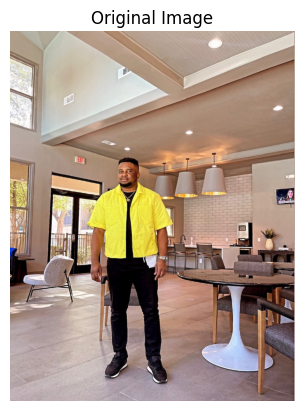

In [7]:
for filename in uploaded.keys():
    # Read and display original image
    img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Original Image")
    plt.show()

In [9]:
# Step 5: Run Detection
results = model.predict(source=filename, save=False, conf=0.3)


image 1/1 /content/IMG_9090.jpg: 640x512 1 person, 1 tie, 5 chairs, 1 potted plant, 1 dining table, 1 vase, 455.7ms
Speed: 16.8ms preprocess, 455.7ms inference, 31.5ms postprocess per image at shape (1, 3, 640, 512)


In [11]:
# Display Detected Objects
for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
        classes = result.boxes.cls.cpu().numpy()  # Class IDs
        confs = result.boxes.conf.cpu().numpy()   # Confidence scores
        labels = [model.names[int(cls)] for cls in classes]

In [12]:
# Draw bounding boxes on the image
for (box, label, conf) in zip(boxes, labels, confs):
            x1, y1, x2, y2 = box.astype(int)
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img_rgb, f"{label} {conf:.2f}", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

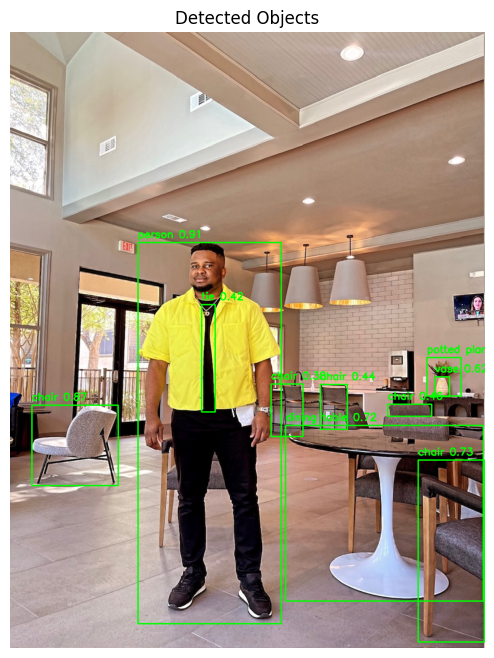

In [14]:
# Show Image with Detections
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Detected Objects")
plt.show()